In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR

In [2]:
# Create some data points (e.g., a noisy sine curve)
X = np.sort(5 * np.random.rand(100, 1), axis=0)
y = np.sin(X).ravel()

In [3]:
# Add some noise to the target variable
y[::5] += 1 * (0.5 - np.random.rand(20))

In [4]:
# Fit an SVR model with a linear kernel
svr_rbf = SVR(kernel='rbf', C=100, epsilon=0.1)
svr_rbf.fit(X, y)

SVR(C=100)

In [5]:
# Make predictions using the trained SVR model
y_pred = svr_rbf.predict(X)

# Define the upper and lower boundaries of the epsilon-tube
epsilon = svr_rbf.epsilon
y_upper = y_pred + epsilon
y_lower = y_pred - epsilon

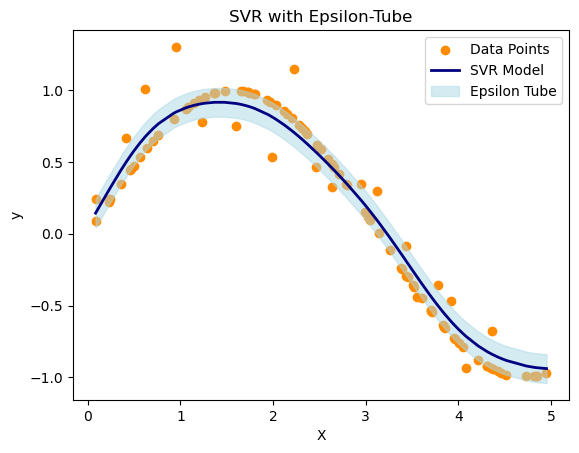

In [6]:
# Plot the data points
plt.scatter(X, y, color='darkorange', label='Data Points', zorder=1)

# Plot the SVR predictions
plt.plot(X, y_pred, color='navy', lw=2, label='SVR Model', zorder=2)

# Plot the epsilon-tube boundaries
plt.fill_between(X.ravel(), y_lower, y_upper, color='lightblue', alpha=0.5, label='Epsilon Tube')

# Add labels and legends
plt.xlabel('X')
plt.ylabel('y')
plt.title('SVR with Epsilon-Tube')
plt.legend()
plt.show()